<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_%EC%B9%B4%EC%9D%B4%EC%A0%9C%EA%B3%B1%EB%B6%84%ED%8F%AC%EC%99%80_%EA%B2%80%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ec%b9%b4%ec%9d%b4%ec%a0%9c%ea%b3%b1-%eb%b6%84%ed%8f%ac%ec%99%80-%ea%b2%80%ec%a0%95-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

In [129]:
import scipy as sp
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 카이제곱분포

k개의 서로 독립적인 표준정규 확률변수가 있을 때 확률변수 제곱의 합의 분포를 카이제곱분포라 한다.

In [130]:
def make_chi2_sample(k=1,scnt=10):
  chi2_sample = []
  for _ in range(scnt):
    sample = norm.rvs(size=k)
    s2 = sum(sample*sample)
    chi2_sample.append(s2)
  return chi2_sample

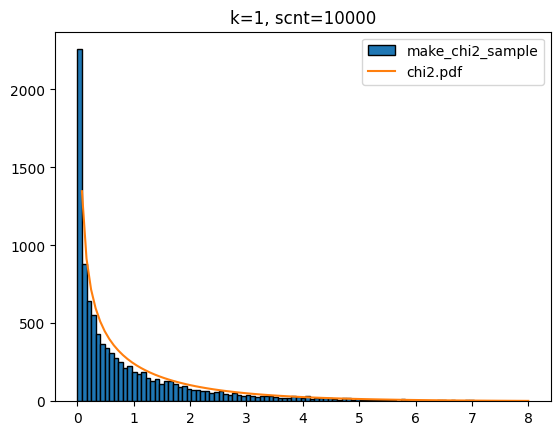

In [133]:
sample = make_chi2_sample(k=1,scnt=10000)
x = np.linspace(0,8,100)
plt.hist(sample,bins=x,edgecolor='k',label='make_chi2_sample')
y = chi2.pdf(df=1,x=x)*1000
plt.plot(x,y,label='chi2.pdf')
plt.legend()
plt.title(f'k=1, scnt=10000')
plt.show()

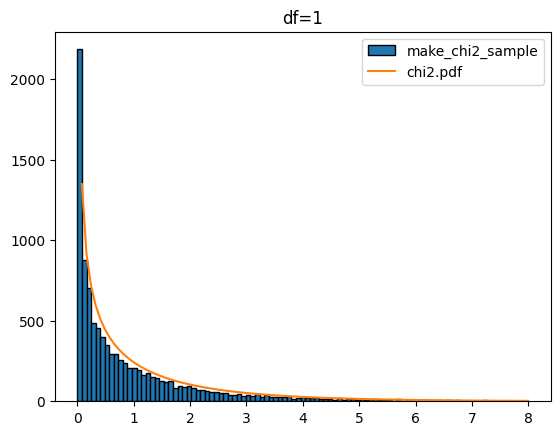

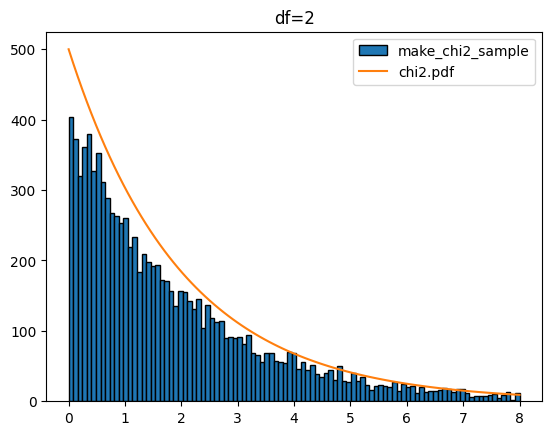

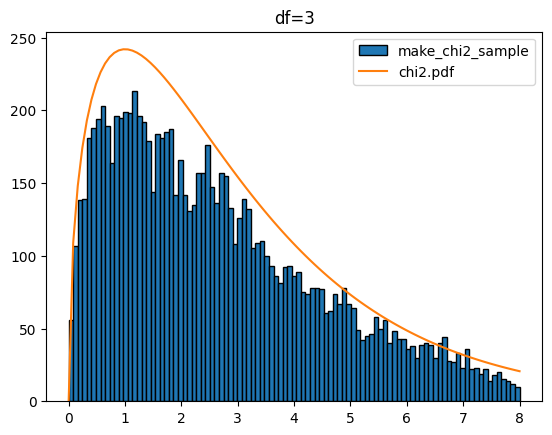

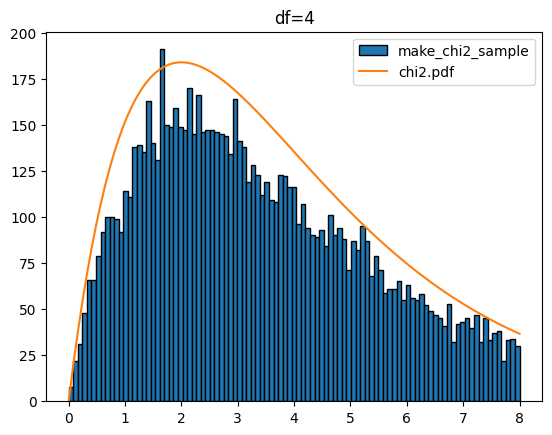

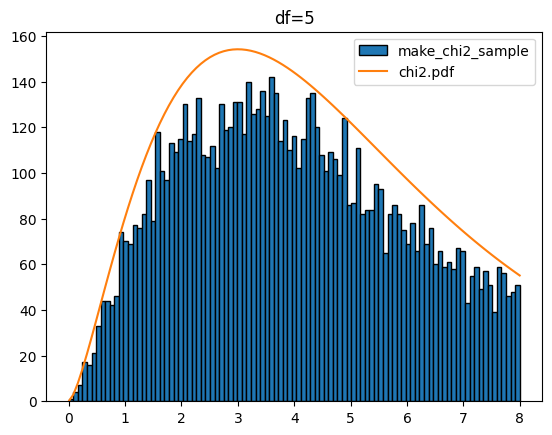

In [134]:
for k in range(1,6):
  sample = make_chi2_sample(k=k,scnt=10000)
  x = np.linspace(0,8,100)
  plt.hist(sample,bins=x,edgecolor='k',label='make_chi2_sample')
  y = chi2.pdf(df=k,x=x)*1000
  plt.plot(x,y,label='chi2.pdf')
  plt.legend()
  plt.title(f'df={k}')
  plt.show()

카이제곱분포를 다루는 stats.chi2에서도 샘플 생성(rvs), 확률 밀도 함수(pdf), 누적 분포 함수(cdf), 퍼센트 포인트 함수(ppf), 생존 함수(sf) 등을 제공합니다. 이들 함수도 정규분포(norm), T분포(t), 연속 균일 분포(uniform)에서 사용과 유사합니다.

여기에서는 이들 함수 사용은 별도로 다루지 않을게요;

## 카이제곱검정

관찰한 빈도와 기대 빈도가 다른지 검정하는 도구입니다.

적합성 검정과 독립성 검정 및 동질성 검정을 할 수 있습니다.

적합성 검정은 표본이 기대에 적합한지 검정

독립성 검정은 두 항목이 서로 독립인지 검정

동질성 검정은 두 집단의 데이터 분포가 같은지 검정(방법은 독립성과 같음)

- 적합도 검정

A 초콜릿 과자 봉지에는 100개의 초콜릿이 들어있다고 한다. 그리고 10가지 종류의 맛이 고르게 들어있다고 한다.

실제 한 봉지를 구입해서 종류별로 세어보니 개수는 다음과 같다.

6, 8, 16, 16, 6, 12, 5, 5,13, 13

A 초콜릿 과자 봉지에는 10가지 종류의 맛이 고르게 들어있다고 할 수 있는지 유의수준 0.05에서 검정하시오.

In [102]:
a_data = np.array([6, 8, 16, 16, 6, 12, 5, 5,13,13])
n = len(a_data)
s = sum(a_data)
e_data = np.ones(n)*(s/n)
print("관찰값:",a_data,sep=' ')
print("기대값:",e_data,sep=' ')
stat, pv = stats.chisquare(f_obs = a_data, f_exp = e_data)
print("p-value는 ",pv)
if pv<0.05:
  print("귀무 가설을 기각한다. 따라서 10가지 종류의 맛이 고르게 들어있다고 볼 수 없다.")
else:
  print("귀무 가설을 채택한다. 따라서 10가지 종류의 맛이 고르게 들어있다고 볼 수 있다.")

관찰값: [ 6  8 16 16  6 12  5  5 13 13]
기대값: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
p-value는  0.03517353946698481
귀무 가설을 기각한다. 따라서 10가지 종류의 맛이 고르게 들어있다고 볼 수 없다.


- 독립성 검정

성별에 따라 좋아하는 영화 장르를 조사해 보았다.

성별에 따라 좋아하는 영화 장르는 관련이 있는지 유의수준 0.05에서 검정하시오.

남성: 7, 3, 19, 7, 8

여성: 15, 9, 8, 10, 6

순서는 코믹, 드라마, 액션, 멜로, 다큐멘터리 순

In [123]:
a_data = np.array([7, 3, 19, 7, 8])
e_data = np.array([15, 9, 8, 10, 6])
chi2,pv,dof,exp = stats.chi2_contingency([a_data, e_data])
print("p-value는 ",pv)
if pv<0.05:
  print("귀무 가설을 기각한다. 따라서 성별과 좋아하는 영화 장르는 독립적이지 않다.")
else:
  print("귀무 가설을 채택한다. 따라서 성별과 좋아하는 영화 장르는 독립적이다.")

p-value는  0.025978311788116746
귀무 가설을 기각한다. 따라서 성별과 좋아하는 영화 장르는 독립적이지 않다.


-동질성 검정

두 그룹의 데이터 분포가 같은지 검정하는 것으로 사용 도구는 독립성 검정과 같다.(검정의 관점이 다를 뿐 방법은 같습니다.)

성별에 따라 좋아하는 영화 장르를 조사해 보았다.

성별에 따라 좋아하는 영화 장르 분포가 같은지 유의수준 0.05에서 검정하시오.

남성: 7, 3, 19, 7, 8

여성: 15, 9, 8, 10, 6

순서는 코믹, 드라마, 액션, 멜로, 다큐멘터리 순

In [124]:
a_data = np.array([7, 3, 19, 7, 8])
e_data = np.array([15, 9, 8, 10, 6])
chi2,pv,dof,exp = stats.chi2_contingency([a_data, e_data])
print("p-value는 ",pv)
if pv<0.05:
  print("귀무 가설을 기각한다. 따라서 성별에 따라 좋아하는 영화 장르 분포가 같다고 볼 수 없다.")
else:
  print("귀무 가설을 채택한다. 따라서 성별에 따라 좋아하는 영화 장르 분포가 같다고 볼 수 있다.")

p-value는  0.025978311788116746
귀무 가설을 기각한다. 따라서 성별에 따라 좋아하는 영화 장르 분포가 같다고 볼 수 없다.
